#1 to 6 gates

In [ ]:
import numpy as np

In [ ]:
def step_function(v):
  if v>=0:
    return 1
  else:
    return 0

In [ ]:
def perceptron(x,w,b):
  yin = np.dot(x,w) + b
  yhat = step_function(yin)
  return yhat

AND


In [ ]:
def AND(x):
  w = np.array([1,1])
  b = -2
  return perceptron(x,w,b)

In [ ]:
test = ([0,0], [0,1], [1,0], [1,1])

print("AND for test 1,1:", AND(test[3]))
print("AND for test 1,0:", AND(test[2]))
print("AND for test 0,1:", AND(test[1]))
print("AND for test 0,0:", AND(test[0]))

AND for test 1,1: 1
AND for test 1,0: 0
AND for test 0,1: 0
AND for test 0,0: 0


OR

In [ ]:
def OR_function(x):
  w = np.array([1,1])
  b = -1
  return perceptron(x,w,b)

In [ ]:
test = ([0,0], [0,1], [1,0], [1,1])

print("OR({}, {}) = {}".format(0, 0, OR_function(test[0])))
print("OR({}, {}) = {}".format(0, 1, OR_function(test[1])))
print("OR({}, {}) = {}".format(1, 0, OR_function(test[2])))
print("OR({}, {}) = {}".format(1, 1, OR_function(test[3])))

OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1


NOT


In [ ]:
def NOT_function(x):
    w = -1
    b = 0
    return perceptron(x, w, b)

In [ ]:
test = [0,1]

print("NOT({}) = ({})".format(0,NOT_function(test[0])))
print("NOT({}) = ({})".format(1,NOT_function(test[1])))

NOT(0) = (1)
NOT(1) = (0)


NOR

In [ ]:
def NOR_function(x):
    return NOT_function(OR_function(x))

In [ ]:
test = ([0,0], [0,1], [1,0], [1,1])

print("NOR({}, {}) = {}".format(0, 0, NOR_function(test[0])))
print("NOR({}, {}) = {}".format(0, 1, NOR_function(test[1])))
print("NOR({}, {}) = {}".format(1, 0, NOR_function(test[2])))
print("NOR({}, {}) = {}".format(1, 1, NOR_function(test[3])))

NOR(0, 0) = 1
NOR(0, 1) = 0
NOR(1, 0) = 0
NOR(1, 1) = 0


NAND

In [ ]:
def NAND_function(x):
    return NOT_function(AND(x))

In [ ]:
test = ([0,0], [0,1], [1,0], [1,1])

print("NAND({}, {}) = {}".format(0, 0, NAND_function(test[0])))
print("NAND({}, {}) = {}".format(0, 1, NAND_function(test[1])))
print("NAND({}, {}) = {}".format(1, 0, NAND_function(test[2])))
print("NAND({}, {}) = {}".format(1, 1, NAND_function(test[3])))

NAND(0, 0) = 1
NAND(0, 1) = 1
NAND(1, 0) = 1
NAND(1, 1) = 0


XOR

In [ ]:
def XOR_function(x):
  return AND([NAND_function(x),OR_function(x)])

In [ ]:
test = ([0,0], [0,1], [1,0], [1,1])

print("XOR({}, {}) = {}".format(0, 0, XOR_function(test[0])))
print("XOR({}, {}) = {}".format(0, 1, XOR_function(test[1])))
print("XOR({}, {}) = {}".format(1, 0, XOR_function(test[2])))
print("XOR({}, {}) = {}".format(1, 1, XOR_function(test[3])))

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


#7)BACKPROPOGATION

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch: 0, Loss: 0.1474394893604118, Accuracy: 0.008403361344537815
Epoch: 100, Loss: 0.04242092734473751, Accuracy: 0.9831932773109243
Epoch: 200, Loss: 0.0345285136509167, Accuracy: 0.8067226890756303
Epoch: 300, Loss: 0.019734498706071593, Accuracy: 0.9243697478991597
Epoch: 400, Loss: 0.01192998714121892, Accuracy: 0.9747899159663865
Epoch: 500, Loss: 0.008951827080023542, Accuracy: 0.9747899159663865
Epoch: 600, Loss: 0.0074713196721149415, Accuracy: 0.9831932773109243
Epoch: 700, Loss: 0.006581936626237928, Accuracy: 0.9831932773109243
Epoch: 800, Loss: 0.0059870383487785495, Accuracy: 0.9831932773109243
Epoch: 900, Loss: 0.005560724825043338, Accuracy: 0.9831932773109243


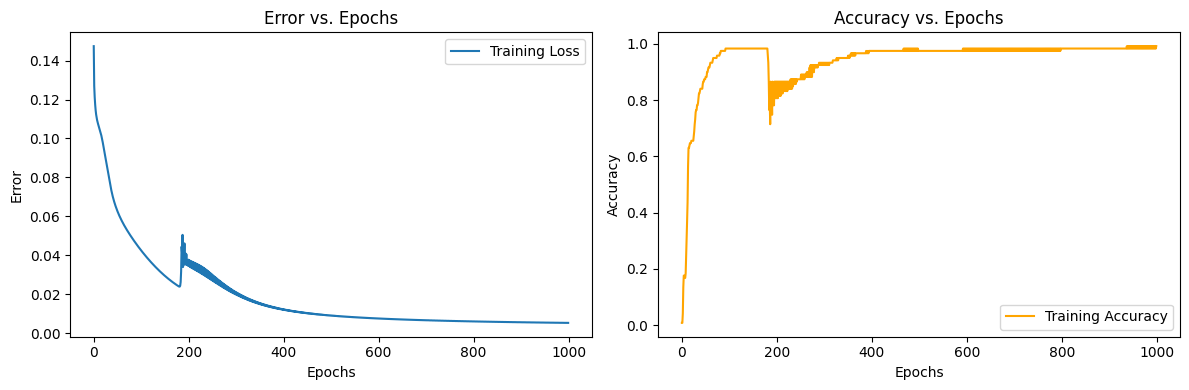

Test Accuracy: 0.9


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset from a file
data = pd.read_csv('/content/iris.data.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Neural Network parameters
input_size = X_train.shape[1]
output_size = y_train.shape[1]
hidden_size = 10
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
biases_output = np.zeros((1, output_size))

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Lists to store training loss for each epoch
loss_history = []
accuracy_history = []

# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward pass
    zin = np.dot(X_train, weights_input_hidden) + biases_hidden
    z = sigmoid(zin)

    yin = np.dot(z, weights_hidden_output) + biases_output
    yhat = sigmoid(yin)

    # Calculate loss
    loss = np.mean(0.5 * (y_train - yhat)**2)
    loss_history.append(loss)

    # Backward pass
    output_error = y_train - yhat
    output_delta = output_error * sigmoid_derivative(yhat)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(z)

    # Update weights and biases
    weights_hidden_output += np.dot(z.T, output_delta) * learning_rate
    biases_output += np.sum(output_delta) * learning_rate

    weights_input_hidden += np.dot(X_train.T, hidden_delta) * learning_rate
    biases_hidden += np.sum(hidden_delta) * learning_rate

    # Calculate accuracy for each epoch
    hidden_layer = sigmoid(np.dot(X_train, weights_input_hidden) + biases_hidden)
    output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) + biases_output)
    predicted_labels = np.argmax(output_layer, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}')

# Plotting the loss vs. epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='Training Loss')
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

# Plotting accuracy vs. epochs
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_history, label='Training Accuracy', color='orange')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Testing the trained neural network
hidden_layer = sigmoid(np.dot(X_test, weights_input_hidden) + biases_hidden)
output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) + biases_output)

# Convert the output to class labels
predicted_labels = np.argmax(output_layer, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy for the test set
test_accuracy = np.mean(predicted_labels == true_labels)
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
np.shape(z)

(119, 10)

#8 and 9(GD)

8)stochastic gradient descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.5, 2.5])
y = np.array([0.2, 0.9])
w = 0
b = 0
alpha = 0.1

In [ ]:
def sigmoid(y_in):
    y_hat = 1 / (1 + np.exp(-y_in))
    return y_hat

In [ ]:
def perceptron(x, w, b):
    y_in = x * w + b
    y_hat = sigmoid(y_in)
    return y_hat

In [ ]:
def d_b(x, y, w, b):
    y_hat = perceptron(x, w, b)
    db = (y - y_hat) * y_hat * (1 - y_hat)
    return db

def d_w(x, y, w, b):
    y_hat = perceptron(x, w, b)
    dw = (y - y_hat) * y_hat * (1 - y_hat) * x
    return dw

In [ ]:
def stochastic_gradient_descent(x, y, w, b):
    epoch = 10
    weights_history = []
    bias_history=[]
    errors = []

    for i in range(epoch):
        error_epoch = 0
        for i in range(len(x)):
            dw = d_w(x[i], y[i], w, b)
            w = w + alpha*dw
            db = d_b(x[i], y[i], w, b)
            b = b + alpha*db
            weights_history.append(w)
            bias_history.append(b)

            error_epoch += (y[i] - perceptron(x[i], w, b)) ** 2
        errors.append(error_epoch / len(x))

    print("The final weights are: ", w)
    print("The final bias is: ", b)

    return weights_history,bias_history, errors

The final weights are:  0.17663314010813974
The final bias is:  0.004681923123944196


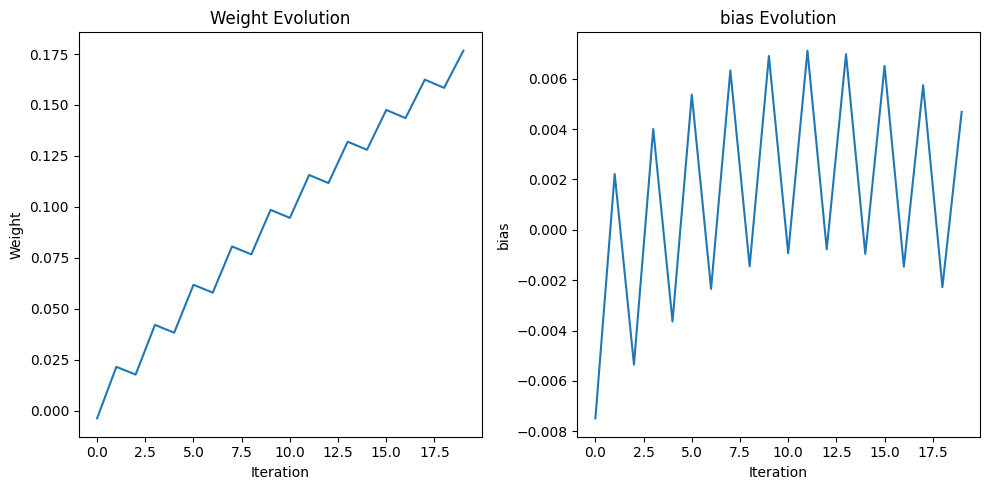

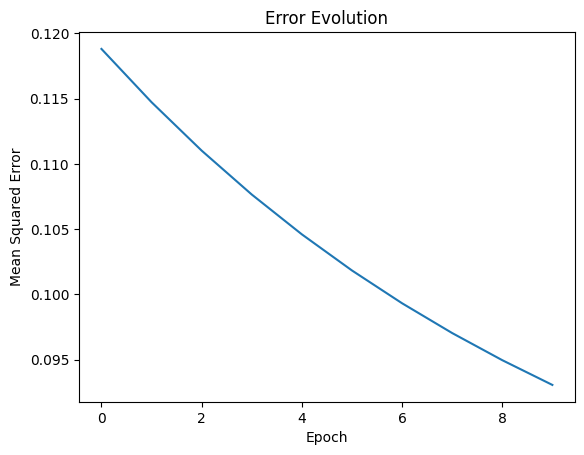

In [ ]:
weight_history,bias_history, errors = stochastic_gradient_descent(x, y, w, b)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(weight_history)
plt.title("Weight Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight")

plt.subplot(122)
plt.plot(bias_history)
plt.title("bias Evolution")
plt.xlabel("Iteration")
plt.ylabel("bias")

plt.tight_layout()

plt.figure()
plt.plot(errors)
plt.title("Error Evolution")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()



9)Batch gradient descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.5, 2.5])
y = np.array([0.2, 0.9])
w = 0
b = 0
alpha = 0.1

In [ ]:
def batch_gradient_descent(x, y, w, b):
    epoch = 10
    weights_history = []
    errors = []

    for i in range(epoch):
        dw = 0
        db = 0
        error_epoch = 0
        for xi, yi in zip(x, y):
            dw = dw + d_w(xi, yi, w, b, alpha)
            db = db + d_b(xi, yi, w, b, alpha)
            error_epoch += (yi - perceptron(xi, w, b)) ** 2

        w = w + dw
        b = b + db

        weights_history.append((w, b))
        errors.append(error_epoch / len(x))

    print("The final weights are: ", w)
    print("The final bias is: ", b)

    return weights_history, errors

In [ ]:
def d_b(x, y, w, b, alpha):
    y_hat = perceptron(x, w, b)
    db = alpha * (y - y_hat) * y_hat * (1 - y_hat)
    return db

def d_w(x, y, w, b, alpha):
    y_hat = perceptron( x, w, b)
    dw = alpha * (y - y_hat) * y_hat * (1 - y_hat) * x
    return dw

In [ ]:
def perceptron(x, w, b):
    y_in = x * w + b
    y_hat = sigmoid(y_in)
    return y_hat

def sigmoid(y_in):
    y_hat = 1 / (1 + np.exp(-y_in))
    return y_hat

The final weights are:  0.17392015991938922
The final bias is:  0.0071790712081918


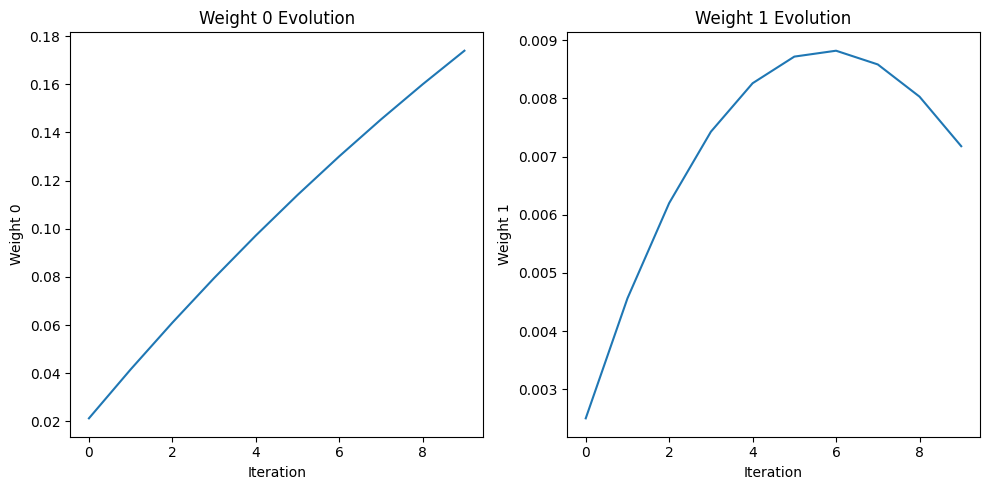

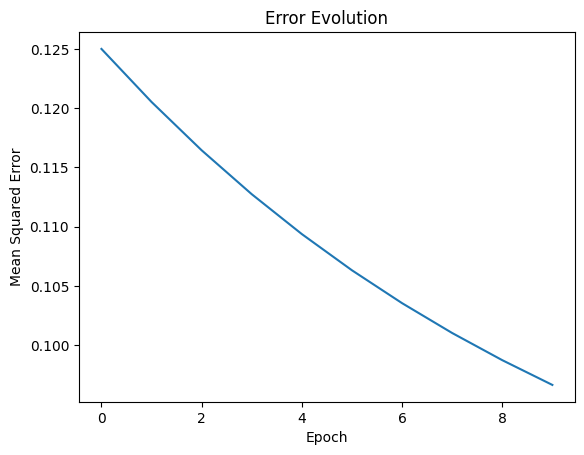

In [ ]:
weights_history, errors = batch_gradient_descent(x, y, w, b)

weight_0_history = [wh[0] for wh in weights_history]
weight_1_history = [wh[1] for wh in weights_history]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(weight_0_history)
plt.title("Weight 0 Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight 0")

plt.subplot(122)
plt.plot(weight_1_history)
plt.title("Weight 1 Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight 1")

plt.tight_layout()

plt.figure()
plt.plot(errors)
plt.title("Error Evolution")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()



#13 to 19)optimzers


In [ ]:
def sigmoid(y_in):
    y_hat = 1 / (1 + np.exp(-y_in))
    return y_hat

In [ ]:
def perceptron(x, w, b):
    y_in = x * w + b
    y_hat = sigmoid(y_in)
    return y_hat

In [ ]:
def grad_w(x, y, w, b):
    y_hat = perceptron(x, w, b)
    db =  (y - y_hat) * y_hat * (1 - y_hat)
    return db

def grad_b(x, y, w, b):
    y_hat = perceptron(x, w, b)
    dw =  (y - y_hat) * y_hat * (1 - y_hat) * x
    return dw

In [ ]:
def minibatch(w, b, x, y,a):
    n = 0.1
    epoch = 10
    batch_size = int(input("Enter the batch size: "))
    for i in range(epoch):
        dw, db, sample_no = 0, 0, 0
        for xi, yi in zip(x, y):
            dw += grad_w( xi, yi,w, b)
            db += grad_b( xi, yi,w, b)
            sample_no += 1
            if sample_no % batch_size == 0:
                w = w - dw*a
                b = b - db *a

    return w, b
x=np.array([0.5,2.5])
y=np.array([1.2,0.9])
w=0.0
b=0
a=0.1
new_w, new_b = minibatch(w, 0, x, y,a)

print("Updated w:", new_w)
print("Updated b:", new_b)

Enter the batch size: 2
Updated w: -0.30371412353678695
Updated b: -0.3879316149854485


In [ ]:
def momentum_descent(w, b, x, y, alpha,beta, num_epochs):
    v_w, v_b = 0.0, 0.0
    for epoch in range(num_epochs):
        dw,db=0,0
        for xi, yi in zip(x, y):
            dw = grad_w( xi, yi,w, b)
            db = grad_b( xi, yi,w, b)

        v_w = beta * v_w +(1-beta)* dw
        v_b = beta * v_b + (1-beta)* db

        w -= v_w*alpha
        b -= v_b*alpha
    return w, b

x=np.array([0.5,2.5])
y=np.array([1.2,0.9])
w=0.0
b=0.0
a=0.1
num_epochs = 10
beta=0.9
new_w, new_b = momentum_descent(w, b, x, y, a, beta, num_epochs)

print("Updated w:", new_w)
print("Updated b:", new_b)

Updated w: -0.042475939030098206
Updated b: -0.10618984757524552


In [ ]:
def NAG(w, b, x, y, alpha, beta, num_epochs):
    v_w, v_b = 0.0, 0.0
    for epoch in range(num_epochs):
        for xi, yi in zip(x, y):
            lookahead_dw = grad_w( xi, yi,w - beta * v_w, b - beta * v_b)
            lookahead_db = grad_b( xi, yi,w - beta * v_w, b - beta * v_b)

            v_w = beta * v_w + (1-beta) * lookahead_dw
            v_b = beta * v_b + (1-beta) * lookahead_db

            w -= alpha*v_w
            b -= alpha*v_b

    return w, b

x=np.array([0.5,2.5])
y=np.array([1.2,0.9])
w=0.0
b=0
a=0.01
num_epochs = 10
beta=0.9
new_w, new_b = NAG(w, 0, x, y, a, beta, num_epochs)

print("Updated w:", new_w)
print("Updated b:", new_b)

Updated w: -0.017971372621995267
Updated b: -0.022248317213196228


In [ ]:
import numpy as np

def adagrad(w, b, x, y, alpha, epsilon, num_epochs):

    for epoch in range(num_epochs):
        d_w=[]
        d_b=[]
        for xi, yi in zip(x, y):
            dw = grad_w( xi, yi,w, b)
            d_w.append(dw**2)
            db = grad_b( xi, yi,w, b)
            d_b.append(db**2)

            w -= (alpha / np.sqrt(sum(d_w)  + epsilon)) * dw
            b -= (alpha / np.sqrt(sum(d_b ) + epsilon)) * db

    return w, b

x=np.array([0.5,2.5])
y=np.array([1.2,0.9])
w=0.0
b=0
a=0.1
num_epochs = 10
eps=0.00001

new_w, new_b = adagrad(w, 0, x, y, a, eps, num_epochs)

print("Updated w:", new_w)
print("Updated b:", new_b)

Updated w: -1.2874456381608765
Updated b: -1.71092347173706


In [ ]:
import numpy as np
def adam(w, b, x, y, alpha, beta1, beta2, epsilon, num_epochs):
    w,b=0.0,0.0
    m_w = np.zeros_like(w)
    m_b, v_b = 0.0, 0.0
    v_w = np.zeros_like(w)
    i=0
    for epoch in range(num_epochs):
        for xi, yi in zip(x, y):
            i += 1
            dw = grad_w(xi, yi,w, b)
            db = grad_b(xi, yi,w, b)
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
            m_w_hat = m_w / (1 - beta1 ** i)
            m_b_hat = m_b / (1 - beta1 ** i)
            v_w_hat = v_w / (1 - beta2 ** i)
            v_b_hat = v_b / (1 - beta2 ** i)
            w -= (alpha / np.sqrt((v_w_hat) + epsilon)) * m_w_hat
            b -= (alpha / np.sqrt((v_b_hat) + epsilon)) * m_b_hat
    return w, b

x=np.array([0.5,2.5])
y=np.array([1.2,0.9])
w,b,a=0.0,0,0.1
num_epochs = 10
esp=0.0001
beta1,beta2 = 0.9,0.999
new_w, new_b = adam(w, 0, x, y, a, beta1, beta2, eps, num_epochs)
print("Updated w:", new_w)
print("Updated b:", new_b)

Updated w: -1.733122256900981
Updated b: -1.5454880397017694


In [ ]:
import numpy as np

def adadelta(w, b, x, y, rho, epsilon, num_epochs):
    w, b = 0.0, 0.0
    E_dw, E_db = 0.0,0.0
    delta_w, delta_b =  0.0,0.0

    for epoch in range(num_epochs):
        for xi, yi in zip(x, y):
            dw = grad_w( xi, yi,w, b)
            db = grad_b(xi, yi,w, b)

            E_dw = rho * E_dw + (1 - rho) * (dw ** 2)
            E_db = rho * E_db + (1 - rho) * (db ** 2)

            delta_w = np.sqrt(delta_w + epsilon) / (np.sqrt(E_dw + epsilon)) * dw
            delta_b = np.sqrt(delta_b + epsilon) / (np.sqrt(E_db + epsilon)) * db


            w -= delta_w
            b -= delta_b

    return w, b

x = np.array([0.5, 2.5])
y = np.array([1.2, 0.9])
w, b, alpha, rho, eps, num_epochs = 0.0, 0.0, 0.1, 0.95, 0.001, 10

new_w, new_b = adadelta(w, b, x, y, rho, eps, num_epochs)
print("Updated w:", new_w)
print("Updated b:", new_b)

Updated w: -2.9028903821121403
Updated b: -2.2394392500995295


#10TO 12)CNN


In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-4-8278da15a130>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


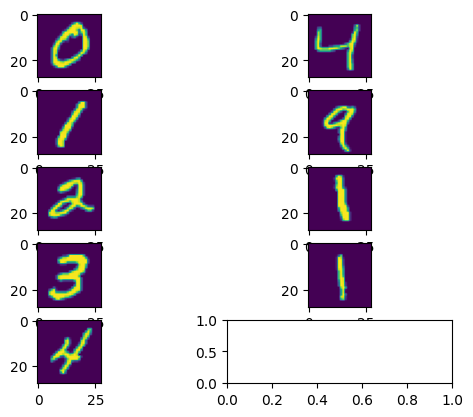

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [ ]:
x_train /= 255
x_test /=255


#THIS
batch_size=64

num_classes=10
epochs=2

def build_model(optimizer):

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])
  model.summary()

  return model

# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

# #for i in optimizers:

model = build_model('Adam')


plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

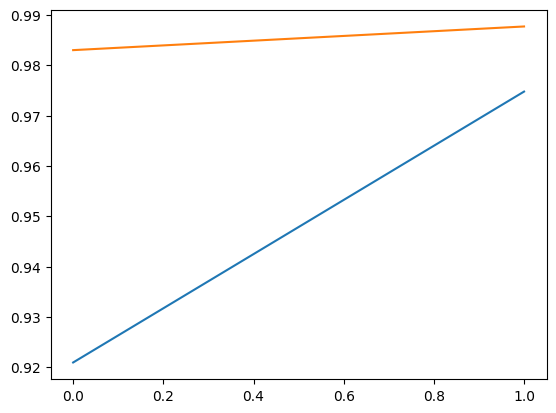

In [ ]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

<ipython-input-11-c2a161e71460>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "mnist.h5", save_format="h5")


1/1 [==============================] - 0s 294ms/step
[[5.5159336e-07 7.6899357e-07 9.9575933e-05 8.5126463e-04 2.4077327e-03
  1.4329277e-03 3.9943174e-07 2.2421975e-05 4.5195708e-04 9.9473250e-01]]
9


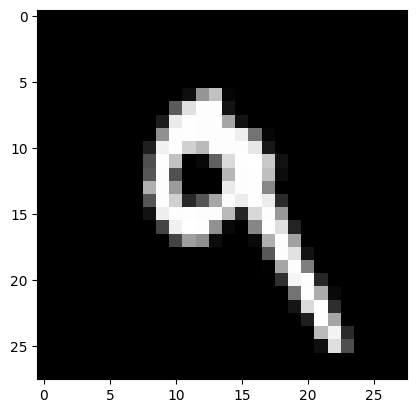

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")

#THIS
def predict_image(model, img):
  # img = cv2.resize(img, (28,28,1))
 img = np.reshape(img,(1, 28, 28))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(answer)
  #label = '' if np.array(pred).size >= 0.5 else 'NORMAL'
  #print("prediction: ", label, "P(Pneumonia): ", pred[0][0])


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')


fashion

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

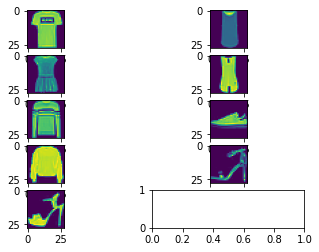

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [ ]:
x_train /= 255
x_test /=255
batch_size=64

num_classes=10
epochs=2

def build_model(optimizer):

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])
  model.summary()

  return model

# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

# #for i in optimizers:

model = build_model('RMSprop')


plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

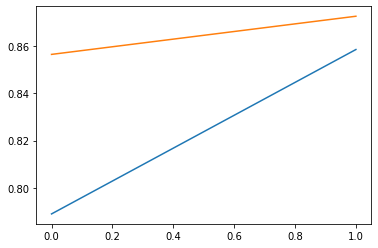

In [ ]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

1/1 [==============================] - 0s 71ms/step
[[2.3701428e-03 6.1609288e-05 1.2226738e-02 7.2117883e-04 1.2293209e-01
  2.2050817e-05 8.5784298e-01 3.4762900e-07 3.8184042e-03 4.3993005e-06]]
Shirt


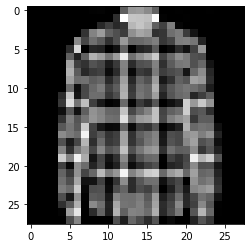

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):
  # img = cv2.resize(img, (28,28,1))
  img = np.reshape(img,(1, 28, 28))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(labels[answer])
  #label = '' if np.array(pred).size >= 0.5 else 'NORMAL'
  #print("prediction: ", label, "P(Pneumonia): ", pred[0][0])


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')


comparison

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

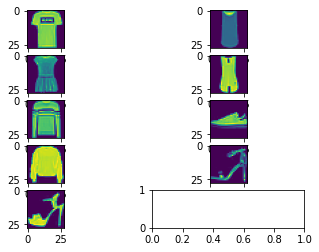

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [ ]:
x_train /= 255
x_test /=255
batch_size=64

num_classes=10
epochs=1

def build_model(optimizer):

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])
  model.summary()

  return model

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

for i in optimizers:

  model = build_model(i)
  plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
  hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))
  y1=hist.history['accuracy']
  y2=hist.history['val_accuracy']
  plt.plot(y1)
  plt.plot(y2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

1/1 [==============================] - 0s 71ms/step
[[2.3701428e-03 6.1609288e-05 1.2226738e-02 7.2117883e-04 1.2293209e-01
  2.2050817e-05 8.5784298e-01 3.4762900e-07 3.8184042e-03 4.3993005e-06]]
Shirt


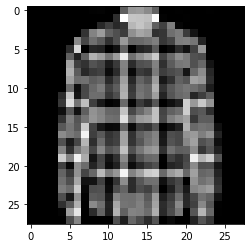

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):
  # img = cv2.resize(img, (28,28,1))
  img = np.reshape(img,(1, 28, 28))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(labels[answer])
  #label = '' if np.array(pred).size >= 0.5 else 'NORMAL'
  #print("prediction: ", label, "P(Pneumonia): ", pred[0][0])


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')


#LSTM

In [113]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
#numpy.random.seed(7)

In [ ]:
top_words = 5000
#THIS
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [ ]:
# truncate and/or pad input sequences
max_review_length = 400
#THIS
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
import tensorflow as tf
# Create the model

embedding_vector_length = 32
#THIS
model = Sequential()
model.add(Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 400, 32)           160032    
                                                                 
 lstm_5 (LSTM)               (None, 10)                1720      
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161,763
Trainable params: 161,763
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#THIS
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
#THIS
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
98/98 [==============================] - 33s 312ms/step - loss: 0.6363 - accuracy: 0.6708 - val_loss: 0.5000 - val_accuracy: 0.8096
Epoch 2/10
98/98 [==============================] - 30s 309ms/step - loss: 0.4134 - accuracy: 0.8388 - val_loss: 0.4061 - val_accuracy: 0.8315
Epoch 3/10
98/98 [==============================] - 33s 338ms/step - loss: 0.3174 - accuracy: 0.8789 - val_loss: 0.3360 - val_accuracy: 0.8656
Epoch 4/10
98/98 [==============================] - 30s 307ms/step - loss: 0.2622 - accuracy: 0.9042 - val_loss: 0.3167 - val_accuracy: 0.8711
Epoch 5/10
98/98 [==============================] - 31s 314ms/step - loss: 0.2246 - accuracy: 0.9200 - val_loss: 0.3211 - val_accuracy: 0.8718
Epoch 6/10
98/98 [==============================] - 42s 429ms/step - loss: 0.2082 - accuracy: 0.9268 - val_loss: 0.3257 - val_accuracy: 0.8698
Epoch 7/10
98/98 [==============================] - 30s 307ms/step - loss: 0.1848 - accuracy: 0.9382 - val_loss: 0.3320 - val_accuracy: 0.8724

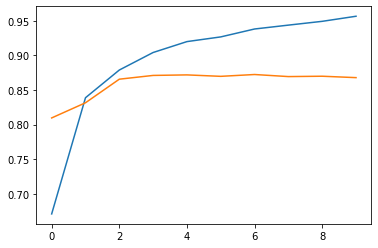

In [ ]:
import matplotlib.pyplot as plt
#THIS
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

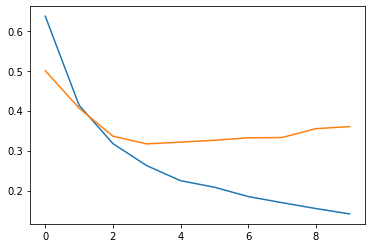

In [ ]:
#THIS
import matplotlib.pyplot as plt
y1=hist.history['loss']
y2=hist.history['val_loss']
plt.plot(y1)
plt.plot(y2)

In [ ]:
pred=model.predict(X_test)
print(pred)

782/782 [==============================] - 23s 29ms/step
[[0.078538  ]
 [0.9890348 ]
 [0.9178903 ]
 ...
 [0.03808012]
 [0.12054291]
 [0.6374319 ]]


#AUTOENCODER

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [ ]:
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


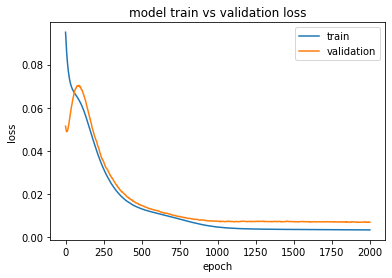

5/5 [==============================] - 0s 3ms/step


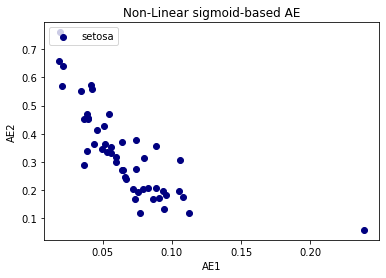

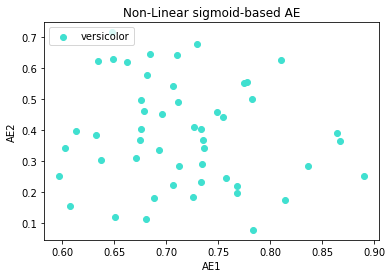

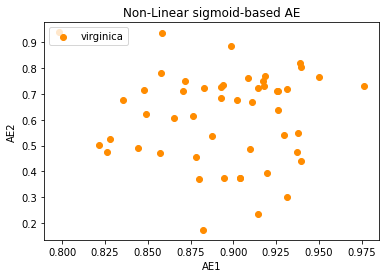

In [ ]:
#THIS
# this is the size of our encoded representations
input_dim = X_scaled.shape[1]
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(input_dim,))

# "encoded" representation of the input
encoded = Dense(encoding_dim,activation='sigmoid')(input_img)

# "decoded" lossy reconstruction of the input
decoded = Dense(input_dim,activation='sigmoid')(encoded)

# Map an input to reconstruction
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse')
print(autoencoder.summary())
history = autoencoder.fit(X_scaled,X_scaled,epochs=2000,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)
''''''
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

# Use the encoded layer to encode the training input
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2],'Non-Linear sigmoid-based AE','AE')

#PCA

## Principle Component Analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names

X: [5.1 3.5 1.4 0.2]


Scaling data using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Defining a function to plot PCA for different targets

In [ ]:
#THIS
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

Implementing and visualizing PCA

Pca transformed:  [-0.63070293  0.10757791 -0.0187191  -0.00730695]


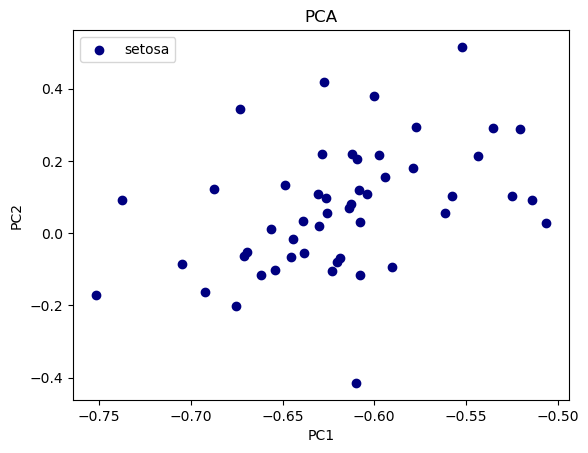

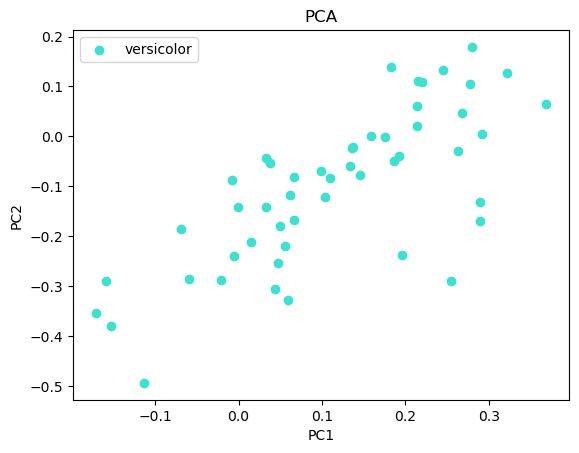

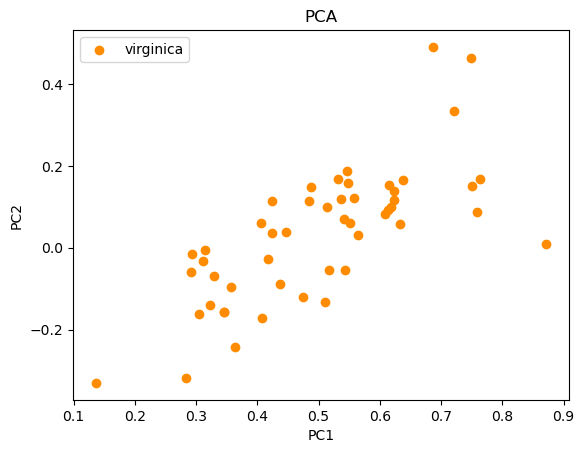

In [ ]:
#THIS
pca = PCA()
pca_transformed = pca.fit_transform(X_scaled)

# Displaying new Transformed Values
print("Pca transformed: ", pca_transformed[0])

# Calling the plotting function
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')


#XAI LIME


In [114]:
!pip install lime
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
np.random.seed(123)

import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings ('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ad5206014e7f018608ab182e8946dc7be9b20d0699a119480c4578fa0cf5da69
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Loading the data to work with
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Setting up the data for modelling
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X

#THIS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

In [ ]:
#THIS

# Building model - Xgboost
model = XGBClassifier(random_state=42,gpu_id=0) # build classifier Gradient Boosted decision trees
model.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
# Making prediction
y_pred = model.predict(X_test)

In [ ]:
# Performance Measurement
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
# Classifier Function for lime explaination
#THIS
predict_fn = lambda x: model.predict_proba(x)

### Lime Explainer

In [ ]:
#THIS
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(),
                                            feature_names=data.feature_names,
                                            class_names=['Negative','Positive'],
                                            mode='classification',
                                            verbose=True)

### Explaining a single data point using lime explainer

In [ ]:
#THIS
data_point = 5
exp = explainer.explain_instance(df.loc[data_point,data.feature_names].astype(int).values, predict_fn, num_features=5)
exp.show_in_notebook(show_table=True)

Intercept 0.5311107960292542
Prediction_local [0.86330721]
Right: 0.92424995


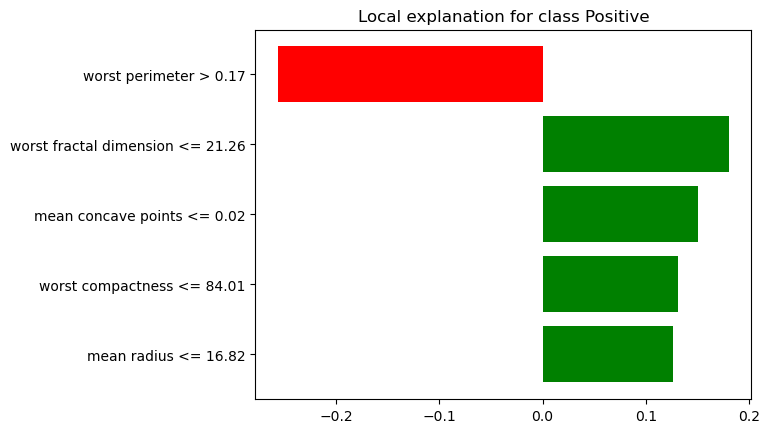

In [ ]:
#THIS
figure = exp.as_pyplot_figure()

# EXPLAINABLE AI: SHAP ALGORITHM

 Importing Libraries Required

In [ ]:
!pip install shap
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
np.random.seed(123)

import shap

import warnings
warnings.filterwarnings ('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.0 MB/s eta 0:00:00


Importing Data

In [ ]:
# Loading the data to work with
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

 Training XGBoost

In [ ]:
# Setting up the data for modelling
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X

#THIS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

In [ ]:
# Building model - Xgboost

#THIS
model = XGBClassifier(random_state=42,gpu_id=0) # build classifier Gradient Boosted decision trees
model.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Making prediction
y_pred = model.predict(X_test)

In [ ]:
# Performance Measurement
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


 Shap explainer

In [ ]:
#THIS
explainer = shap.TreeExplainer(model)

 Storing Shap expected value

In [ ]:
#THIS
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

Explaining XGBoost AI using Shap explainer

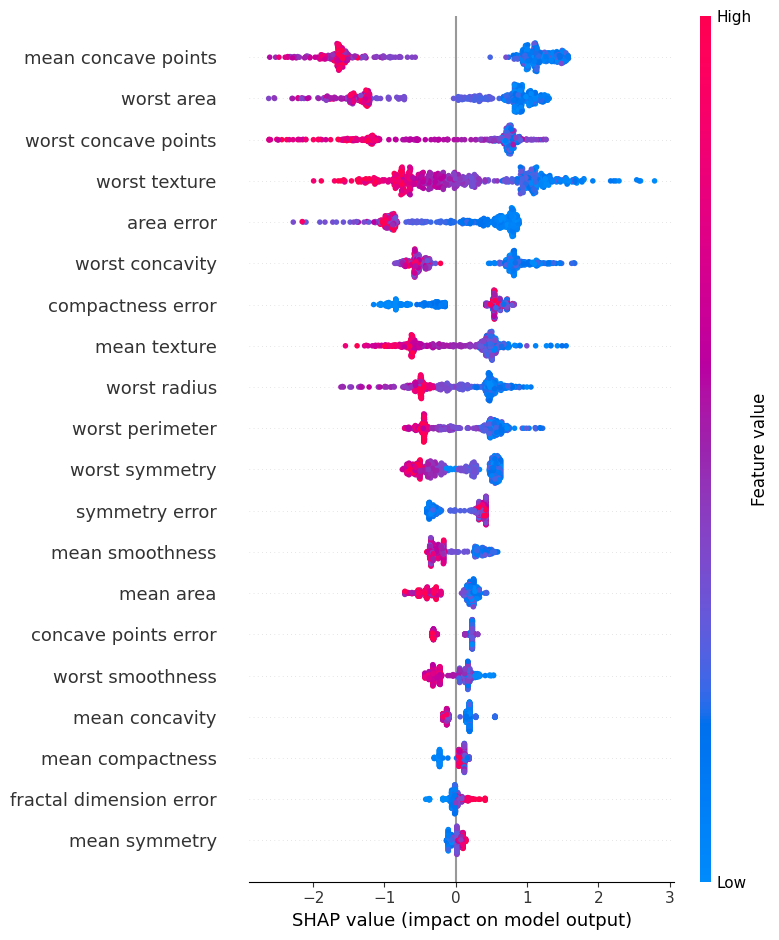

In [ ]:
#THIS
shap.summary_plot(shap_values, X,title="SHAP summary plot")

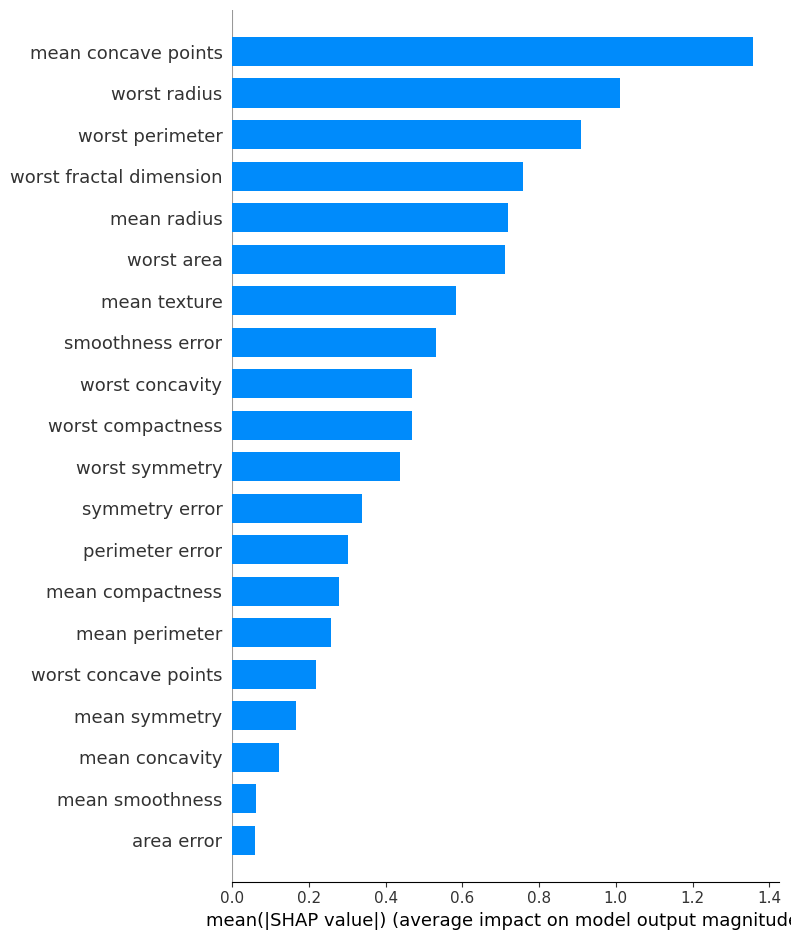

In [ ]:
#THIS
shap.summary_plot(shap_values, X,plot_type="bar", feature_names=data.feature_names)

#SOM

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=3db7a759c5c4223588d910692fe3658d0dfc371ed3f86a52c360118b65de899d
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


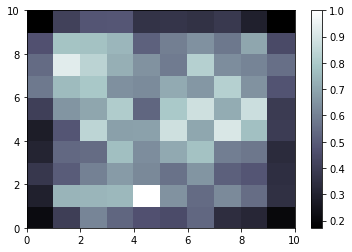

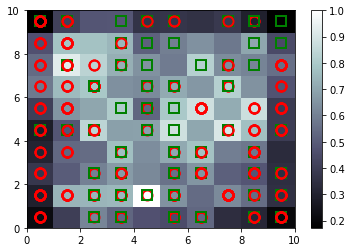

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [ ]:
# Loading Data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Card_Applications.csv')

# X
data

In [ ]:
# Shape of the data:
#THIS
data.shape

In [ ]:
# Info of the data:
#THIS
data.info()

In [ ]:
# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

#THIS
# X variables:
pd.DataFrame(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
#THIS
X = sc.fit_transform(X)
pd.DataFrame(X)

In [ ]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

#THIS
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

# Returns the distance map from the weights:
som.distance_map()

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [ ]:
mappings = som.win_map(X)
mappings
mappings.keys()
len(mappings.keys())

mappings[(9,8)]
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)
frauds

# the list of customers who are frauds:
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,28.17,0.585,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,260.0
1,0.0,37.33,2.500,2.0,3.0,8.0,0.210,0.0,0.0,0.0,0.0,2.0,260.0
2,0.0,40.83,3.500,2.0,3.0,5.0,0.500,0.0,0.0,0.0,0.0,1.0,1160.0
3,0.0,18.58,10.000,2.0,2.0,4.0,0.415,0.0,0.0,0.0,0.0,2.0,80.0
4,0.0,38.92,1.665,2.0,6.0,4.0,0.250,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,39.08,4.000,2.0,8.0,4.0,3.000,0.0,0.0,0.0,0.0,2.0,480.0
6,0.0,38.33,4.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,160.0
7,0.0,19.17,5.415,2.0,3.0,8.0,0.290,0.0,0.0,0.0,0.0,2.0,80.0
8,0.0,25.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
9,0.0,32.00,6.000,2.0,2.0,4.0,1.250,0.0,0.0,0.0,0.0,2.0,272.0
